# Exploring the connectivity of geometric graphs

We're going to be looking at Geometric graphs and investigating the following characteristics:

1. Radius of $\sqrt{2}$ everything is connected --> high density
2. How small can $R$ be before we have disconnected nodes being the majority of graphs generated
3. % of connected graphs as density changes


AFTER that once we have confidence % changing being less than 5% -- continue to regenerate geometric graphs


Run 500x: Probablistic Geometric Graphs
0. Randomly put nodes in a unit square
1. Randomly generate a radius $r$.
2. Randomly generate a probablity $p$, such that an edge less than the radius is connected
3. What is the density? What is the % of graphs connected?


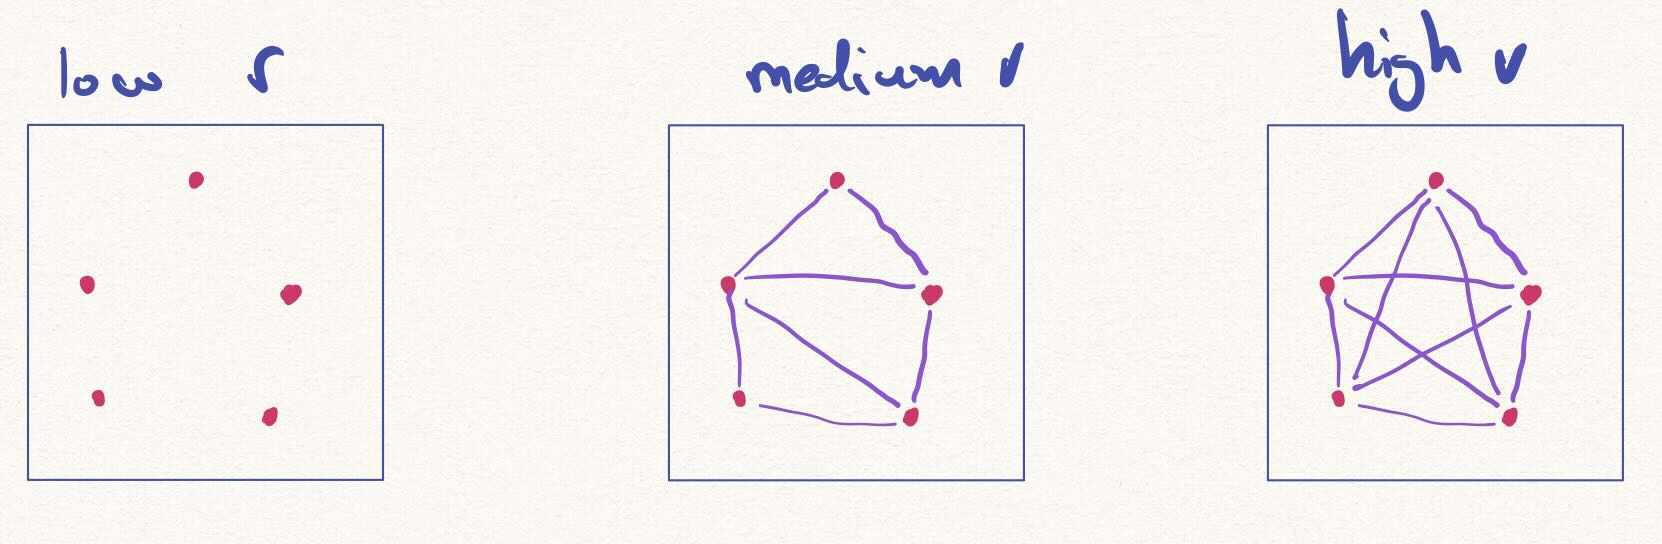


In [1]:
import networkx as nx
import numpy as np
import random
import pylab
import copy
import pandas as pd
from qaoa_vrp.generators.graph_instance import GraphInstance


## Example of a connected graph (often with a high radius)


In [91]:
N = 10
graph_info_dict = {
    "num": None,
    "radius": None,
    "connected": None,
    "density": None
}

data = []
for radius in np.linspace(0, np.sqrt(2), num=200):
    for i in range(5000):
        graph_info_dict_new = copy.deepcopy(graph_info_dict)
        graph_info_dict_new["radius"] = radius
        G_geom = GraphInstance(
            nx.random_geometric_graph(N, radius=radius), "Geometric"
        )
        graph_info_dict_new["num"] = i
        graph_info_dict_new["connected"] = nx.algorithms.components.is_connected(G_geom.G)
        graph_info_dict_new["density"] = nx.classes.function.density(G_geom.G)
        data.append(graph_info_dict_new)

In [92]:
d_geom_graphs = pd.DataFrame(data)
d_geom_graphs

,num,radius,connected,density
0,0,0.000000,False,0.0
1,1,0.000000,False,0.0
2,2,0.000000,False,0.0
3,3,0.000000,False,0.0
4,4,0.000000,False,0.0
...,...,...,...,...
999995,4995,1.414214,True,1.0
999996,4996,1.414214,True,1.0
999997,4997,1.414214,True,1.0
999998,4998,1.414214,True,1.0


In [93]:
d_geom_graphs.to_csv("../data/geometric-graphs.csv")

In [94]:
d_geom_summ = d_geom_graphs.groupby(["radius", "connected"]).count().reset_index()
d_geom_summ = d_geom_summ.drop(['density'], axis=1)
d_geom_summ = d_geom_summ.rename(columns={"num": "n"})
d_geom_summ["perc"] = d_geom_summ.groupby('radius')['n'].apply(lambda x: x*100/x.sum())
# Filter for connected-ness percentage
d_geom_summ = d_geom_summ[d_geom_summ["connected"] == True]

In [95]:
d_geom_graphs[d_geom_graphs["connected"] == True].groupby("radius")["density"].mean().reset_index()

,radius,density
0,0.177665,0.288889
1,0.191878,0.266667
2,0.198985,0.222222
3,0.206091,0.222222
4,0.213198,0.351111
...,...,...
169,1.385787,1.000000
170,1.392894,1.000000
171,1.400000,1.000000
172,1.407107,1.000000


[(0.0, 110.0)]

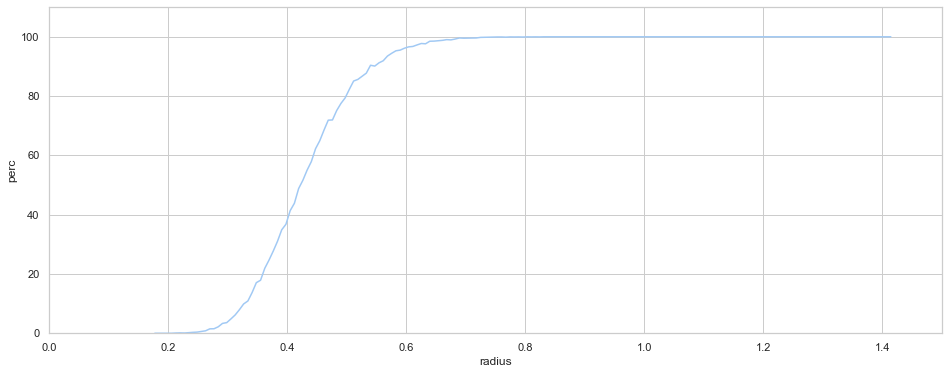

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline
plt.figure(figsize=(16, 6))

# Make line plot
perc_plot = sns.lineplot(data=d_geom_summ, x="radius", y="perc")
perc_plot.set(xlim=(0, 1.5))
perc_plot.set(ylim=(0, 110))

[(0.0, 1.1)]

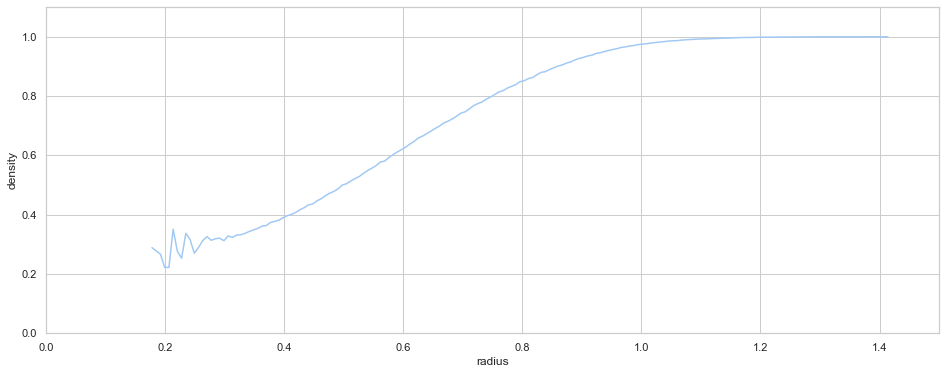

In [101]:
d_radius_density = d_geom_graphs[d_geom_graphs["connected"] == True].groupby("radius")["density"].mean().reset_index()
plt.figure(figsize=(16, 6))
dens_plot = sns.lineplot(data=d_radius_density, x="radius", y="density")
dens_plot.set(xlim=(0, 1.5))
dens_plot.set(ylim=(0, 1.1))

# Notes
- ~~We want a range of densities -- so lets generate the same graphs but plot the density strucutre too!~~
- I want to see where geometric graphs have low density -- reduce radius threshold to generate these graphs (even if this we are increasing the time it to takes to run)
- Where do graphs from different generates sit in the ISA, at a fixed density!
- For example, random graph with a fixed density vs another one
- How do we find the geometric graphs with VERY LOW density
- FIX RANDOM GRAPHS
- Log the energy gap
- Add another quantum algorithms (what can I vary in the VQE)

'1.4.0'